# Goal
Check that Websegmenter is able to extract information of the website as well as the classic pure html `extractor`.

# Associated User Stories
- https://dev.azure.com/alpha10x/ALPHA10X/_workitems/edit/9529
- https://dev.azure.com/alpha10x/ALPHA10X/_workitems/edit/9528

In [1]:
from utils import WebSegmenter,visualize_graph,get_summary
import pandas as pd
import pprint
import seaborn as sns
from datetime import datetime
import pickle
import numpy as np


## Get Output graph of websegmenter

In [2]:
pdf = pd.read_csv('PE_relevant_sample_2023_05_23.csv')
pdf.head()
print(pdf.shape)

(1000, 2)


In [3]:
# pdf = pdf.iloc[0:300,:]


In [4]:
def get_graph(url):
    websegmenter = WebSegmenter(url=url)
    websegmenter.run()
    try :
        graph = websegmenter.graph
    except:
        graph = None
    return graph

In [5]:
#pdf['graph'] = pdf['url'].apply(lambda x: get_graph(x))

out = []
for i, url in enumerate(pdf['url'].values.tolist()):
    print(i, '->', url)
    graph = get_graph(url)
    out.append(graph)

pdf['graph'] = out

0 -> http://churchillglass.co.uk
1 -> http://www.ppwoniu.com
2 -> http://www.hansecom.com
3 -> http://costimp.it
4 -> http://ortesia.com
5 -> http://www.afit.ro
6 -> http://www.phone580.com
7 -> http://www.garage-gatti.fr
8 -> http://jaipurhaveli.com
9 -> http://www.bbci.eu
10 -> http://publish.manheim.com
11 -> http://www.elektronik-produkt.de
12 -> http://www.dsjet.com
13 -> http://seamfix.com
14 -> http://tailwindapp.com
15 -> http://www.zeusagro.com
16 -> http://yoappstore.com
17 -> http://bucknerbarrel.com
18 -> http://chiropodyandpodiatry.co.uk
19 -> http://astroprint.cz
20 -> http://www.jabe.net
21 -> http://www.dekonconstruction.com
22 -> http://www.aldautomotive.co.uk
23 -> http://www.JARCO.com
24 -> http://www.kyocera-hardcoating.com
25 -> http://soneva-beauty.co.uk
26 -> http://www.sauter-personal.de
27 -> http://www.instrumentariumdental.com
28 -> http://pharmacyinsurance.com.au
29 -> http://corbets.com.au
30 -> http://chenerycontractorsltd.co.uk
31 -> http://pmcrobot.cn
32

c:\Users\jbapt\Documents\ALPHA10X\Web-segmenter\utils.py:216: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(r.text, 'html.parser').body


869 -> http://kmwloaders.com
870 -> http://bodiesbyryan.com.au
871 -> http://www.beechhillgrange.co.uk
872 -> http://britenglishschool.com
873 -> http://kaiserwetter.eu
874 -> http://www.bcsmechanical.com
875 -> http://identisys.co.uk
876 -> http://www.aeroquipcu.com
877 -> http://greenmountainimports.com
878 -> http://thestockbuyer.com
879 -> http://www.mayenexpress.com
880 -> http://www.deula-warendorf.de
881 -> http://www.speakeasytheatre.co.uk
882 -> http://www.facebook.com
883 -> http://angerer-steuerberatung.at
884 -> http://www.namastaysober.com
885 -> http://catalog.kita.org
886 -> http://www.stimmel-sports.de
887 -> http://www.ceifx.com
888 -> http://www.elite.link
889 -> http://www.mkann.com
890 -> http://pandiansurfactants.com
891 -> http://www.tuskastl.de
892 -> http://aromacleanliving.com.au
893 -> http://chingfordhouseschool.co.uk
894 -> http://www.profi-servicewerkstatt.de
895 -> http://www.magda-bittner-simmet-stiftung.de
896 -> http://www.avamarble.com
897 -> http://pr

In [6]:
pdf['graph'] = out

In [7]:
pdf.to_csv(f'PE_relevant_sample_2023_05_23_with_graph_tmp_{datetime.now().strftime("%Y_%m_%d_%H_%M_%S")}.csv', index=False)

In [8]:
pdf['any_graph'] = pdf['graph'].apply(lambda x: 0 if x is None or len(x) == 0 else 1)

<Axes: >

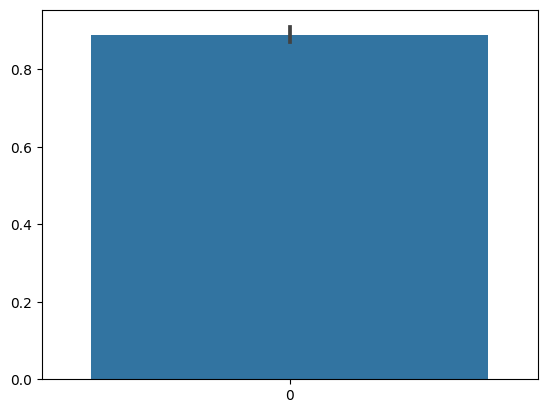

In [9]:
sns.barplot(pdf['any_graph'])

In [10]:
pdf['graph_size'] = pdf['graph'].apply(lambda x: len(x) if x is not None else 0)

In [11]:
pdf

,url,content,graph,any_graph,graph_size
0,http://churchillglass.co.uk,\n ; Fast Emergency Glaziers Croydon CR0 | All...,"(21aa7af207b82794bfbc02e0b561f1175ba85299, 698...",1,134
1,http://www.ppwoniu.com,For full functionality of this site it is nece...,(),0,0
2,http://www.hansecom.com,; IT + Software Lösungen für den ÖPNV - Hans...,"(3b74338a7e136d2e7a4791ea334933f022268e6d, a9d...",1,154
3,http://costimp.it,\n ; Impresa di Costruzioni Piacenza Lodi – Ri...,"(698f1cae7b3208b2df9856db2d951ddddc7022bf, d70...",1,60
4,http://ortesia.com,; Ortesia Pain Relief & Skin Care CBD Produc...,"(26723d5bfc738bc8c8249b49c36a45a871da5093, 698...",1,153
...,...,...,...,...,...
995,http://www.ovay.com.cn,\n ; 首页,(),0,0
996,http://allcopy.com.br,\n ; All Copy ; Abrir Chamado ; FALE COM NOSSO...,"(35f49c5ca7d90ba975d48cde43b203390e9dab87, a83...",1,80
997,http://www.wellservicetechnology.co.uk,\n ; WELL SERVICE TECHNOLOGY ; HOME ; PROFILE ...,"(698f1cae7b3208b2df9856db2d951ddddc7022bf, 0a7...",1,23
998,http://www.ciceron.com,\n ; Ciceron - The Digital Agency For Brands T...,"(ea33753ed70136287dbdcc0d3f605ea48ca48d60, c3a...",1,66


In [12]:
pdf.shape

(1000, 5)

### Save output to `.pickle` and `.csv`

In [13]:
pickle.dump(pdf, open('PE_relevant_sample_2023_05_23_with_analysis.pkl', 'wb'))

In [14]:
pdf.to_csv('PE_relevant_sample_2023_05_23_with_analysis.csv', index=False)

## Analysis

### Load data

In [7]:
#read the pickle file
pdf = pickle.load(open('PE_relevant_sample_2023_05_23_with_analysis.pkl', 'rb'))

### Overall raw success

In [11]:
print(f"On a sample of {pdf.shape[0]} pages, we have {pdf['any_graph'].sum()} pages with a graph",
      f"resulting in an average success rate of {pdf['any_graph'].mean()*100:.1f}% ")

On a sample of 1000 pages, we have 889 pages with a graph resulting in an average success rate of 88.9% 


### Sample of unsuccesful websegmenter

In [24]:
pdf[pdf['any_graph']== 0].head()

,url,content,graph,any_graph,graph_size,has_javascript,has_nan,has_nan_or_javascript
1,http://www.ppwoniu.com,For full functionality of this site it is nece...,(),0,0,1,0,1
6,http://www.phone580.com,蜂助手-以数字科技助力便捷生活 ; You need to enable JavaScrip...,(),0,0,1,0,1
17,http://bucknerbarrel.com,NaN,(),0,0,0,1,1
20,http://www.jabe.net,NaN,(),0,0,0,1,1
23,http://www.JARCO.com,\n ; Jarco | Setting the Propane Truck Standar...,(),0,0,0,0,0


In [16]:
# Add flag to check for the presence of javascript in the content, this is robust to the presence of Nan values
pdf['has_javascript'] = pdf['content'].apply(lambda x: 1 if 'javascript' in str(x).lower() else 0)

In [22]:
# Add flag for the presence of NaN in the content column
pdf['has_nan'] = pdf['content'].apply(lambda x: 1 if str(x).lower() == 'nan' else 0)

<Axes: xlabel='any_graph', ylabel='has_nan_or_javascript'>

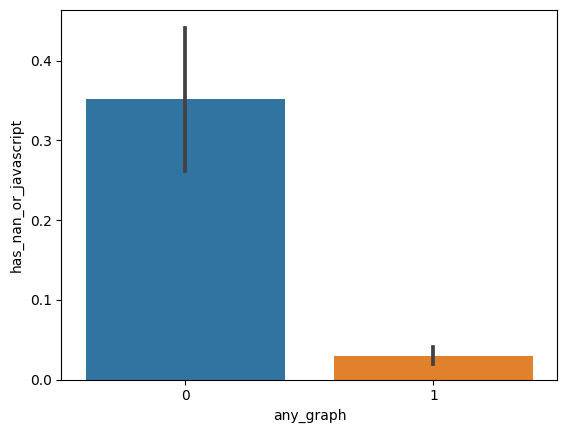

In [27]:
sns.barplot(data=pdf, x='any_graph', y='has_nan_or_javascript')

A third of the unsuccessful websegmenter are due to the fact that the website is probably dynamic. 

### Sample of unsuccessful and not NaN or Javascript

In [28]:
pdf[(pdf['any_graph']== 0)&(pdf['has_nan_or_javascript']== 0)].head()

,url,content,graph,any_graph,graph_size,has_javascript,has_nan,has_nan_or_javascript
23,http://www.JARCO.com,\n ; Jarco | Setting the Propane Truck Standar...,(),0,0,0,0,0
36,http://www.ndxcards.com,\n ; \n,(),0,0,0,0,0
42,http://www.thevictorcloset.com,\n ; The House of Victor Official Global Bouti...,(),0,0,0,0,0
67,http://maistro.ru,\n,(),0,0,0,0,0
77,http://yoalearning.com,約克郡線上學院 YOA Learning ;,(),0,0,0,0,0


In [73]:
pdf['content_length'] = pdf['content'].apply(lambda x: len(str(x)) if str(x).lower() != 'nan' else 0)

In [70]:
# normalize the content length by the sum of the content length per any_graph group to get the proportion of content length per group and then flatten the multi-index
pdf['content_length'] = pdf.groupby('any_graph')['content_length'].apply(lambda x: x/x.count()).reset_index(level=0, drop=True)

<Axes: xlabel='any_graph', ylabel='content_length'>

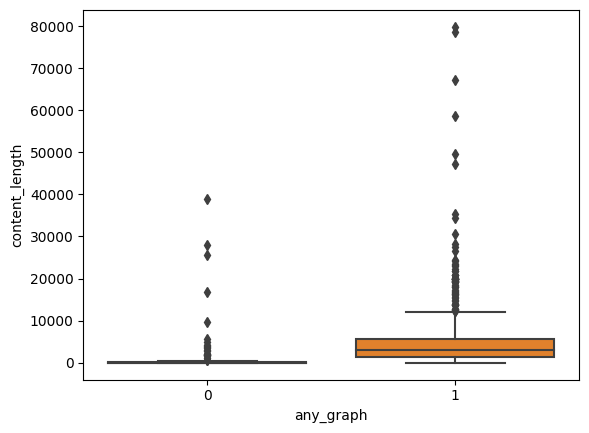

In [78]:
sns.boxplot(data=pdf, y='content_length', x='any_graph') #, bins=100, common_norm=False)

The unsuccessfull websegmenter seems to be for content of lower size.

### Samples of of unsuccessful and not NaN or Javascript and long enough length

In [81]:
pdf[(pdf['any_graph']== 0)&(pdf['has_nan_or_javascript']== 0)&(pdf['content_length']>240)].shape

(25, 10)

We have 25 samples to manually review/

In [79]:
pdf[(pdf['any_graph']== 0)&(pdf['has_nan_or_javascript']== 0)&(pdf['content_length']>240)].head()

,url,content,graph,any_graph,graph_size,has_javascript,has_nan,has_nan_or_javascript,content_length,content_length_log
23,http://www.JARCO.com,\n ; Jarco | Setting the Propane Truck Standar...,(),0,0,0,0,0,3108,0.018715
42,http://www.thevictorcloset.com,\n ; The House of Victor Official Global Bouti...,(),0,0,0,0,0,3859,0.019218
107,http://www.synerbuild.com,\n ; Home | synerBuild | San Francisco Project...,(),0,0,0,0,0,1977,0.017662
109,http://bishvilaych.org,; Bishvilech Center | Medical Center for Wom...,(),0,0,0,0,0,4310,0.019475
156,http://blackstoreboutique.negocio.site,BlackStore.Boutique - Vestuário/marcas ; Black...,(),0,0,0,0,0,2202,0.017913
